# Topic Similarity

```yaml
Course:    DS 5001 
Module:    08 Lab
Topic:     LDA Topic Similarity
Author:    R.C. Alvarado
Date:      09 March 2023
```

**Purpose:** To explore topc similarity in various vector spaces.

# Set Up

## Imports

In [1]:
import pandas as pd
import numpy as np
import plotly_express as px
import seaborn as sns; sns.set()

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

## Config

In [3]:
import configparser
config = configparser.ConfigParser()
config.read("../../../env.ini")
data_home = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']
local_lib = config['DEFAULT']['local_lib']

In [4]:
import sys; sys.path.append(local_lib)
from hac import HAC
from hac2 import HAC as HAC2

In [5]:
# data_in = '../data/output'
# data_out = '../data/output'
# local_lib = "../lib/"

data_prefix = 'austen-melville'
colors = "YlGnBu"
n_topics = 40
OHCO = ['book_id','chap_num']

# Get the Data

In [6]:
# ls {data_in}/{data_prefix}-LDA*

In [7]:
DOCS = pd.read_csv(f"{output_dir}/{data_prefix}-LDA_DOCS-chaps.csv").set_index(OHCO)
TOPICS = pd.read_csv(f"{output_dir}/{data_prefix}-LDA_TOPICS-{n_topics}.csv").set_index('topic_id')
THETA = pd.read_csv(f"{output_dir}/{data_prefix}-LDA_THETA-{n_topics}.csv").set_index(OHCO)
PHI = pd.read_csv(f"{output_dir}/{data_prefix}-LDA_PHI-{n_topics}.csv").set_index('topic_id')

In [8]:
LIB = pd.read_csv(f'{output_dir}/{data_prefix}-LIB_FIXED.csv').set_index('book_id')

Create a short label for each author for display purposes.

In [9]:
LIB['author_key'] = LIB.author.str.split(', ').str[0].str.lower()

# Topic Pairs

In [10]:
from scipy.spatial.distance import pdist

In [11]:
tpairs_idx = [(a, b) for a, b in pd.MultiIndex.from_product([TOPICS.index, TOPICS.index]) if a < b]

In [12]:
TPAIRS = pd.DataFrame(tpairs_idx, columns=['topic_id_x', 'topic_id_y']).set_index(['topic_id_x', 'topic_id_y'])

In [13]:
TPAIRS['theta_cityblock'] = pdist(THETA.T, 'cityblock')
TPAIRS['theta_cosine'] = pdist(THETA.T, 'cosine')
TPAIRS['theta_canberra'] = pdist(THETA.T, 'canberra')
TPAIRS['theta_jaccard'] = pdist(THETA.T, 'jaccard')
TPAIRS['theta_js'] = pdist(THETA.T, 'jensenshannon')

TPAIRS['phi_cityblock'] = pdist(PHI, 'cityblock')
TPAIRS['phi_cosine'] = pdist(PHI, 'cosine')
TPAIRS['phi_canberra'] = pdist(PHI, 'canberra')
TPAIRS['phi_jaccard'] = pdist(PHI, 'jaccard')
TPAIRS['phi_js'] = pdist(PHI, 'jensenshannon')

In [14]:
TPAIRS.sort_values('theta_js')

theta_cityblock  theta_cosine  theta_canberra  \
topic_id_x topic_id_y                                                  
T20        T38              135.647018      0.534193      337.056888   
T05        T20              122.698434      0.650342      399.328643   
           T38              122.943910      0.676759      375.877172   
T29        T34               75.074541      0.681091      246.114897   
T23        T38              121.363512      0.653998      388.603958   
...                                ...           ...             ...   
T27        T38              139.709681      0.997487      442.398723   
T16        T27               27.455050      0.998562      186.359041   
T02        T38              156.435708      0.993397      526.716027   
T09        T29               32.532032      0.998345      189.321885   
T25        T38              167.498225      0.992581      554.836243   

                       theta_jaccard  theta_js  phi_cityblock  phi_cosine  \
topic_id_x topic_id_y                                                       
T20        T38              0.475936  0.505537   36175.144603    0.302109   
T05        T20              0.500891  0.590688   36215.497315    0.560435   
           T38              0.483957  0.598328   35300.910609    0.424495   
T29        T34              0.343137  0.614591   21376.082654    0.362923   
T23        T38              0.439394  0.638292   38411.755215    0.576653   
...                              ...       ...            ...         ...   
T27        T38              0.482175  0.821054   40448.588704    0.749198   
T16        T27              0.319073  0.821463    5545.357600    0.776060   
T02        T38              0.543672  0.821503   42428.198415    0.839497   
T09        T29              0.282531  0.821815    7286.616936    0.885570   
T25        T38              0.564171  0.821918   45489.604702    0.838182   

                       phi_canberra  phi_jaccard    phi_js  
topic_id_x topic_id_y                                       
T20        T38          1483.839618      0.51750  0.441646  
T05        T20          1648.449674      0.50025  0.547661  
           T38          1564.653996      0.48225  0.507595  
T29        T34          1706.405967      0.49550  0.550733  
T23        T38          1578.866932      0.44375  0.617276  
...                             ...          ...       ...  
T27        T38          1741.637121      0.46450  0.688388  
T16        T27          1089.319435      0.30275  0.696149  
T02        T38          1790.991947      0.48300  0.741765  
T09        T29          1036.459056      0.28300  0.726535  
T25        T38          1904.229954      0.52250  0.710582  

[780 rows x 10 columns]

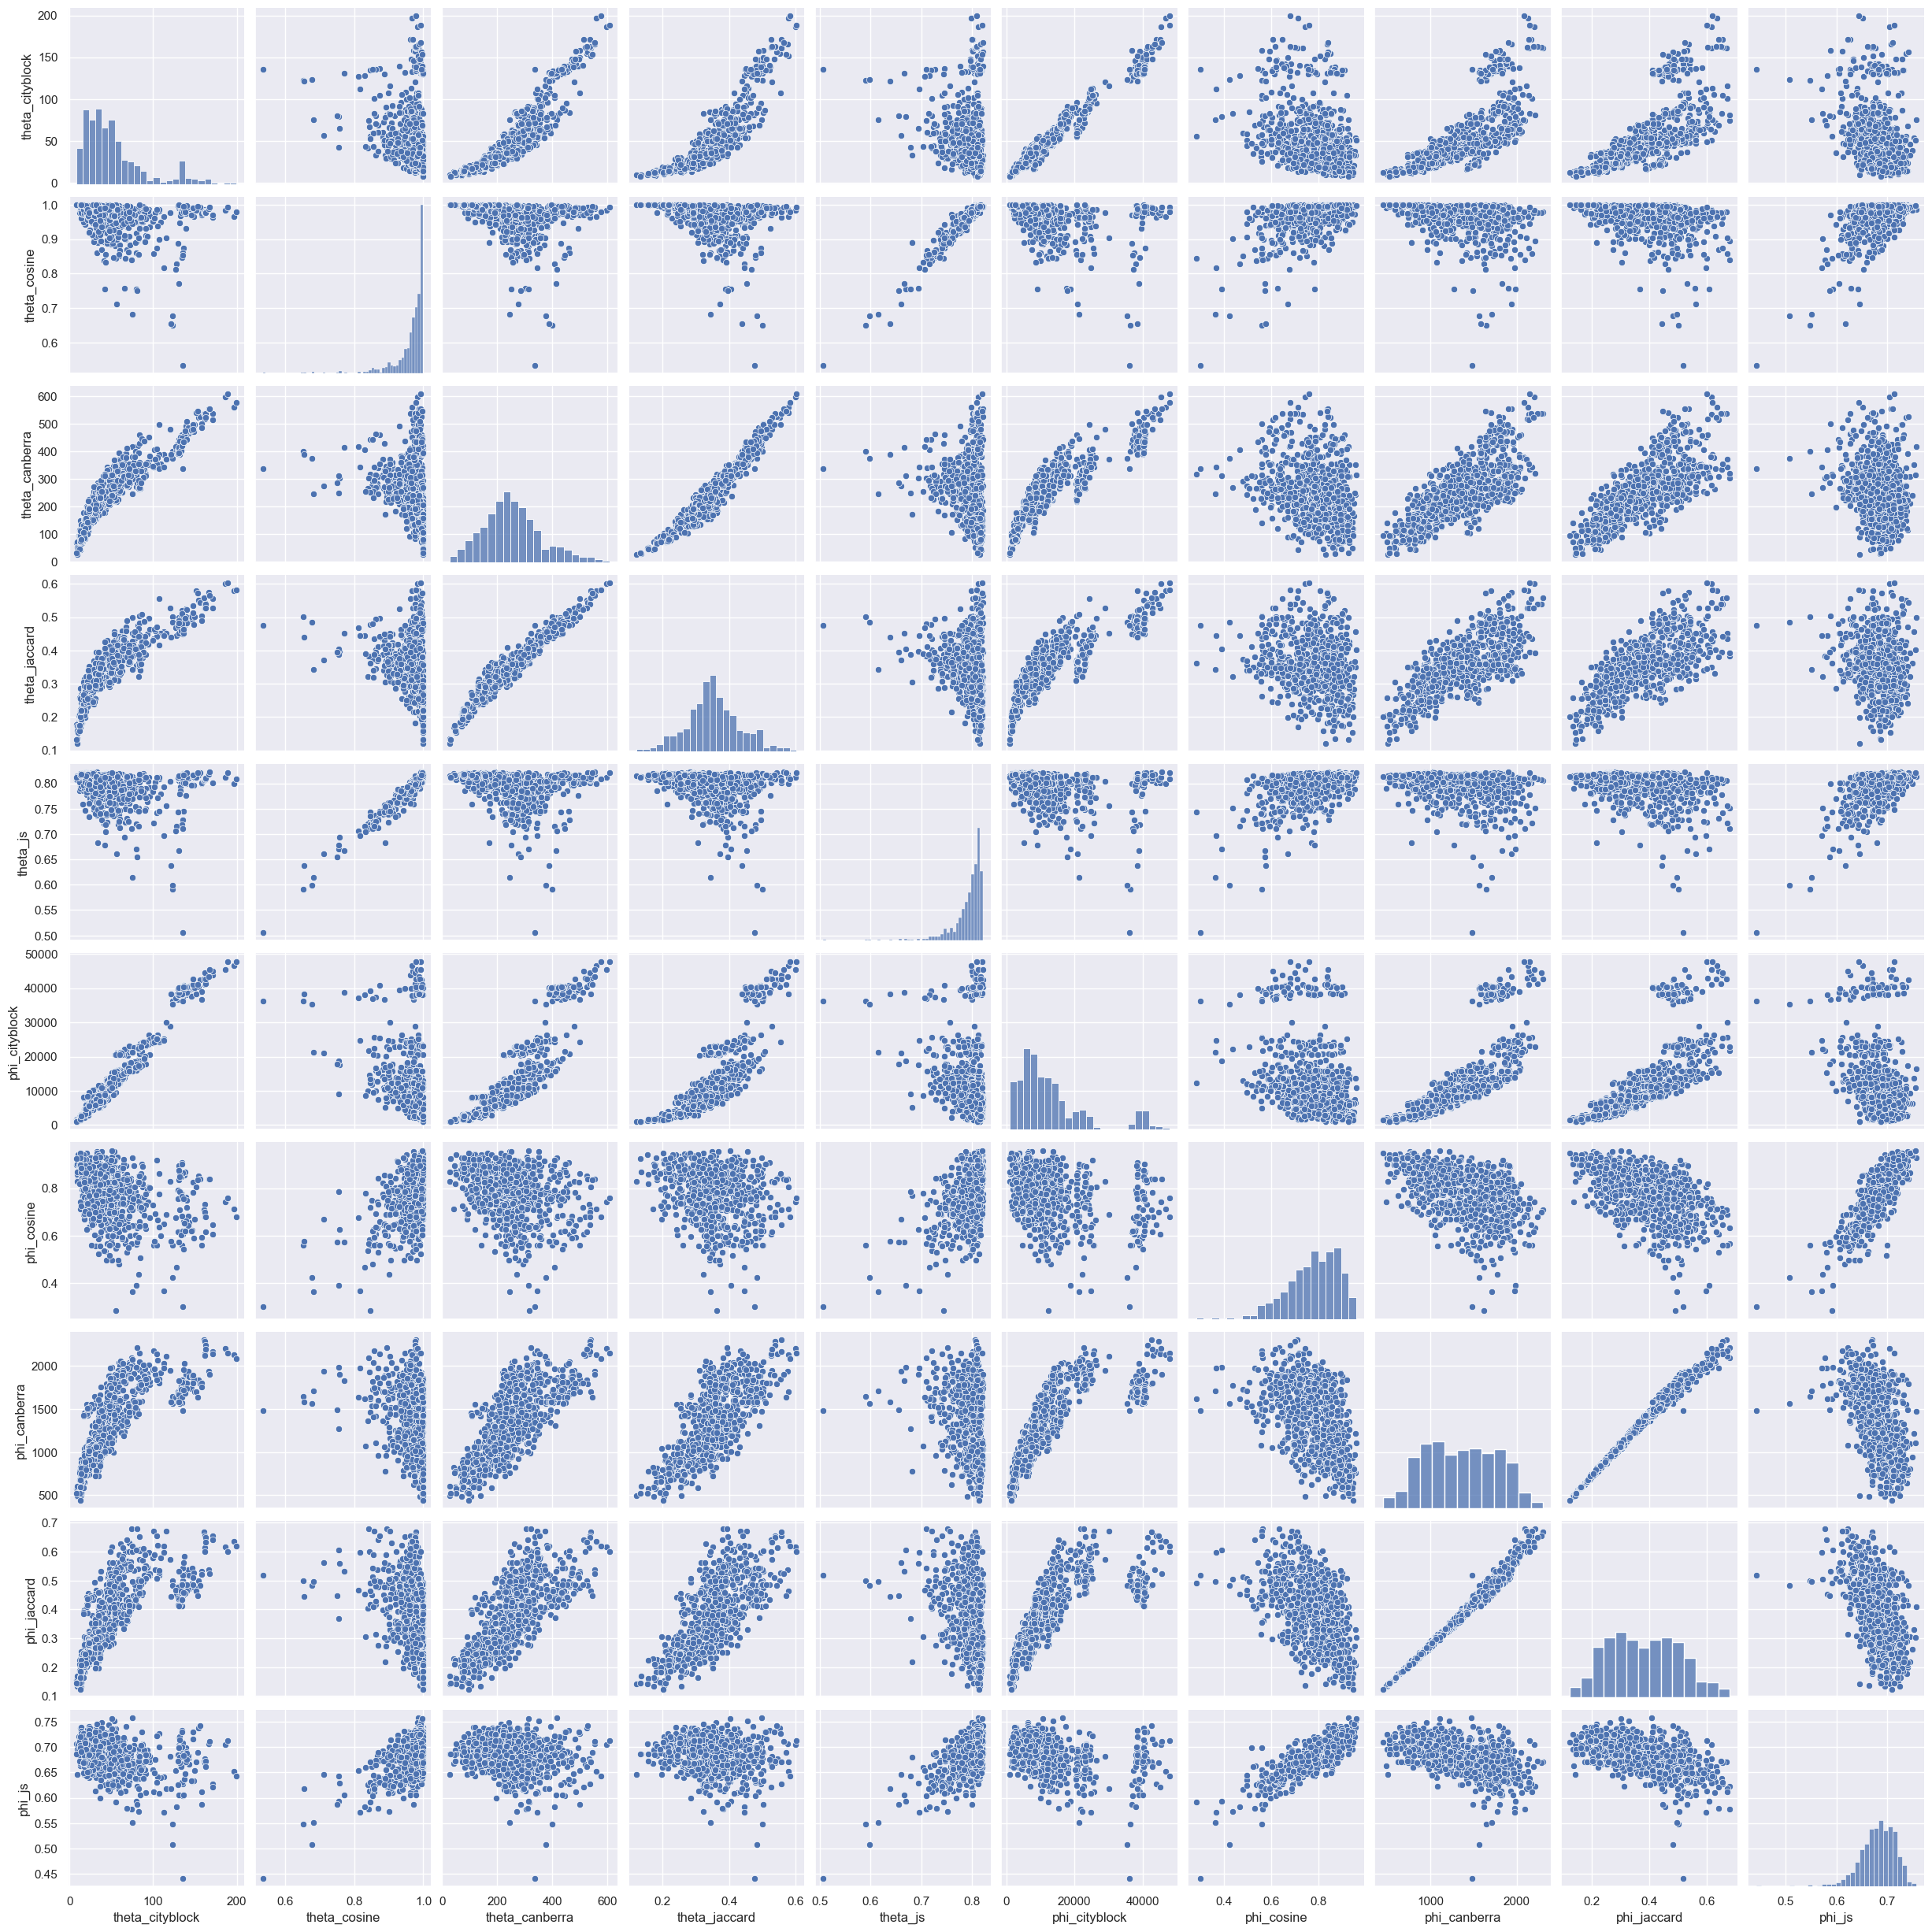

In [15]:
sns.pairplot(TPAIRS);

In [16]:
px.scatter(TPAIRS.reset_index(), 'theta_cosine', 'phi_js',
        hover_data=['topic_x','topic_y'],
        marginal_x = 'histogram', marginal_y = 'histogram',
        height=800, width=800)

ValueError: Value of 'hover_data_0' is not the name of a column in 'data_frame'. Expected one of ['topic_id_x', 'topic_id_y', 'theta_cityblock', 'theta_cosine', 'theta_canberra', 'theta_jaccard', 'theta_js', 'phi_cityblock', 'phi_cosine', 'phi_canberra', 'phi_jaccard', 'phi_js'] but received: topic_x

# Clutser Topics

Use PHI and THETA as vector spaces to cluster topics.

In [ ]:
labels = [f"{a.upper()} {b}" for a, b in zip(TOPICS.author, TOPICS.label)]

In [ ]:
labels[:5]

## By PHI

In [ ]:
HAC(PHI, labels=labels).plot();

## By THETA

In [ ]:
HAC(THETA.T, labels=labels).plot();

# PCA of Topics

## By PHI

In [ ]:
pca_engine_phi = PCA(2)

In [ ]:
PHI_COMPS = pd.DataFrame(pca_engine_phi.fit_transform(normalize(PHI, norm='l2', axis=1)), index=PHI.index)

In [ ]:
HAC(PHI_COMPS, labels=labels).plot()

In [ ]:
px.scatter(PHI_COMPS.reset_index(), 0, 1, 
           size=TOPICS.term_freq, 
           color=TOPICS.author, 
           text='topic_id', hover_name=TOPICS.label, height=600, width=700)

In [ ]:
PHI_LOADINGS = pd.DataFrame(pca_engine_phi.components_.T * np.sqrt(pca_engine_phi.explained_variance_), index=PHI.T.index)
PHI_LOADINGS.index.name = 'term_str'

In [ ]:
px.scatter(PHI_LOADINGS.reset_index(), 0, 1, text='term_str', height=600, width=700)

## By THETA

In [ ]:
pca_engine_theta = PCA(5)

In [ ]:
THETA_COMPS = pd.DataFrame(pca_engine_theta.fit_transform(normalize(THETA.T.values, norm='l2', axis=1)), index=THETA.T.index)
THETA_COMPS.index.name = 'topic_id'

In [ ]:
HAC(THETA_COMPS, labels=labels).plot()

In [ ]:
px.scatter(THETA_COMPS.reset_index(), 0, 1, 
           size=TOPICS.doc_weight_sum, color=TOPICS.author, 
           text='topic_id', hover_name=TOPICS.label, 
           height=600, width=700)

In [ ]:
THETA_LOADINGS = pd.DataFrame(pca_engine_theta.components_.T * np.sqrt(pca_engine_theta.explained_variance_), index=THETA.index)

In [ ]:
DOCS['doc_label'] = DOCS.apply(lambda x: f"{LIB.loc[x.name[0]].label}-{x.name[1]}", axis=1)
DOCS['book'] = DOCS.apply(lambda x: f"{LIB.loc[x.name[0]].label}", axis=1)
DOCS['n_chars'] = DOCS.doc_str.str.len()

In [ ]:
px.scatter(THETA_LOADINGS.reset_index(), 0, 1, 
           size=DOCS.n_chars, color=DOCS.book, 
           height=600, width=900)

# Save

In [ ]:
TPAIRS.to_csv(f"{output_dir}/{data_prefix}-TOPICPAIRS-{n_topics}.csv", index=True)